# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
import datetime as dt

sns.set_style('darkgrid')

np.random.seed(1205)

In [2]:
# --- Utility Functions ---
def compute_log_returns(prices):
    return np.log(prices / prices.shift(1)).dropna()

def normality_test_results(log_returns):
    p = stats.normaltest(log_returns)[1]
    conclusion = "Not Normal" if p < 0.05 else "Possibly Normal"
    return p, conclusion

def remove_outliers(data, z_thresh=2.5):
    data = data.values.flatten()
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return data[z_scores < z_thresh]

def test_normality_over_time(log_returns, window=126):
    results = []
    for i in range(0, len(log_returns) - window + 1, window):
        segment = log_returns[i:i + window]
        p_val = stats.normaltest(segment)[1]
        results.append((i, segment.index[0], p_val))
    return results

In [3]:
# --- Stock Symbols and Date Range ---
#symbols = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'NVDA', 'JNJ', 'JPM', 'WMT', 'XOM', 'T']
symbols = ['AAPL', 'TSLA', 'JNJ', 'NVDA', 'JPM', 'WMT', 'XOM', 'T']
start_date = dt.datetime.today() - dt.timedelta(days=10*365)
end_date = dt.datetime.today()

log_return_dict = {}
p_value_summary = []

# --- Download Data and Run Normality Tests ---
for sym in symbols:
    df = yf.download(sym, start=start_date, end=end_date)
    if df.empty: continue
    log_ret = compute_log_returns(df['Close'])
    log_return_dict[sym] = log_ret
    p, conclusion = normality_test_results(log_ret)
    print(sym, p, conclusion)
    p_value_summary.append({'Symbol': sym, 'Overall p-value': np.round(p, 4), 'Conclusion': conclusion})

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


AAPL [7.55638496e-75] Not Normal


[*********************100%***********************]  1 of 1 completed


TSLA [5.08481355e-55] Not Normal


[*********************100%***********************]  1 of 1 completed


JNJ [1.1703083e-114] Not Normal


[*********************100%***********************]  1 of 1 completed


NVDA [3.01550394e-78] Not Normal


[*********************100%***********************]  1 of 1 completed


JPM [6.4554847e-113] Not Normal


[*********************100%***********************]  1 of 1 completed


WMT [8.09740588e-123] Not Normal


[*********************100%***********************]  1 of 1 completed


XOM [2.4550638e-76] Not Normal


[*********************100%***********************]  1 of 1 completed

T [2.9349773e-108] Not Normal


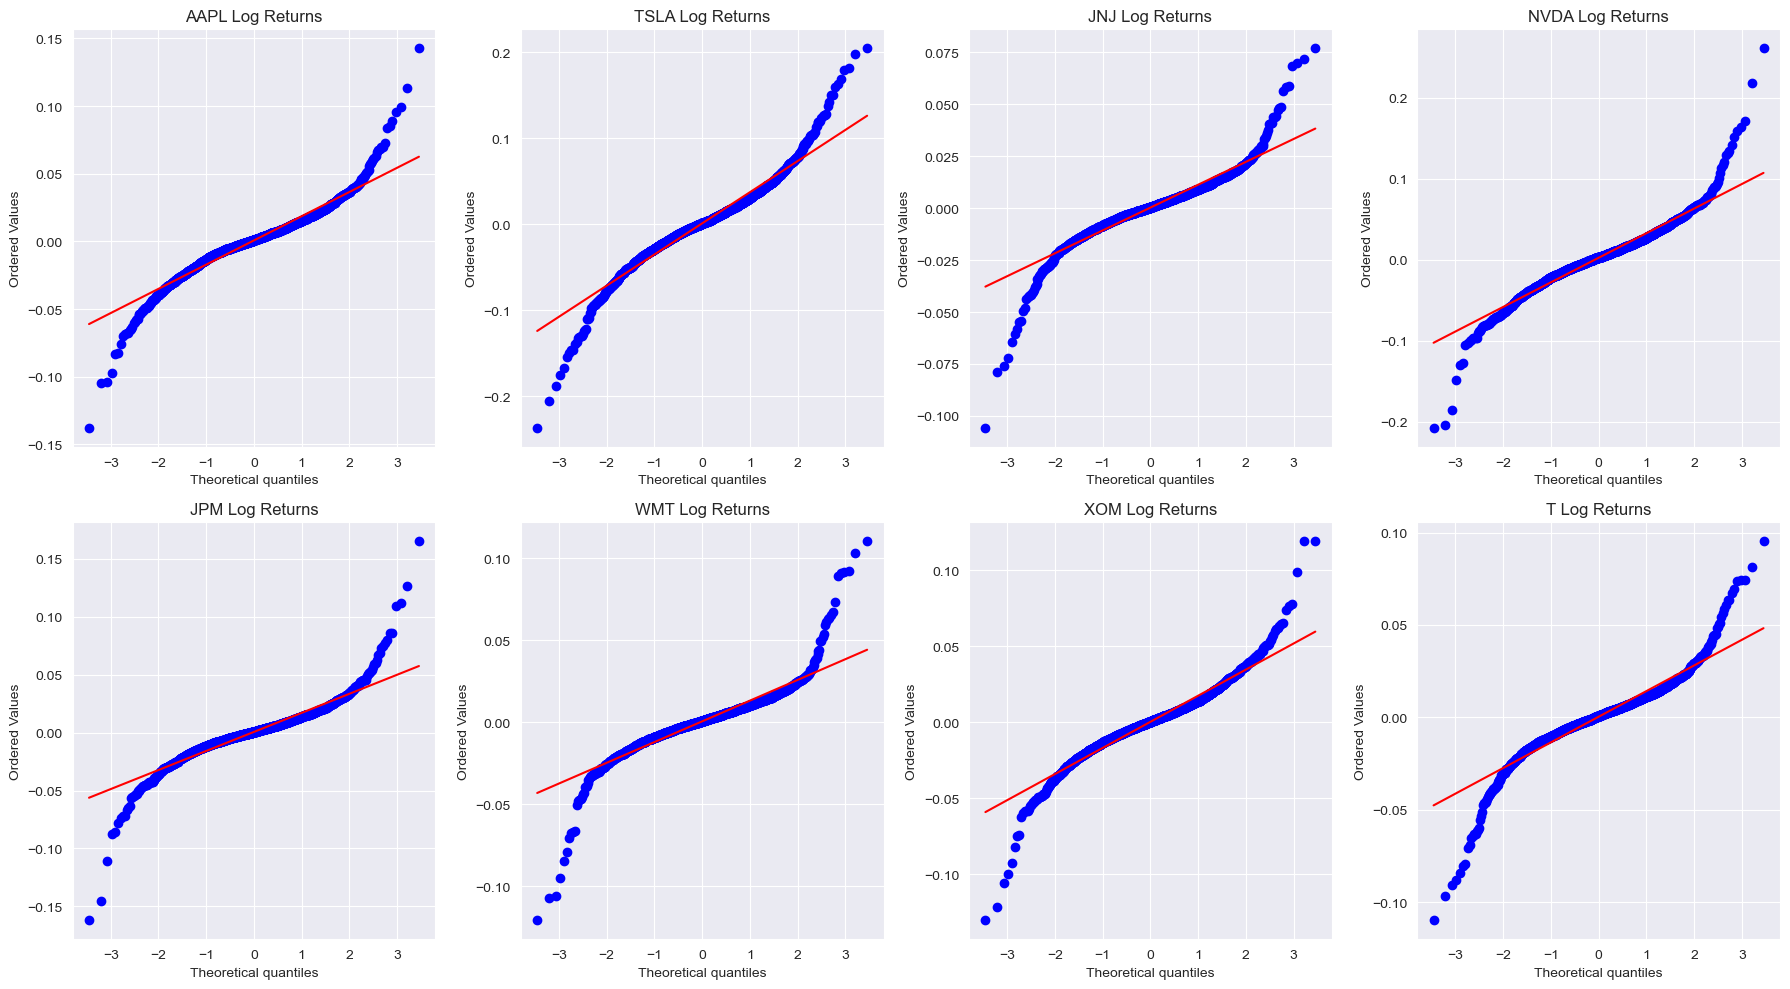

In [4]:
# --- Visualize Probability Plots ---
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
for i, (sym, log_ret) in enumerate(log_return_dict.items()):
    log_ret = log_ret.values.flatten()
    stats.probplot(log_ret, dist="norm", plot=axes[i])
    axes[i].set_title(f"{sym} Log Returns")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

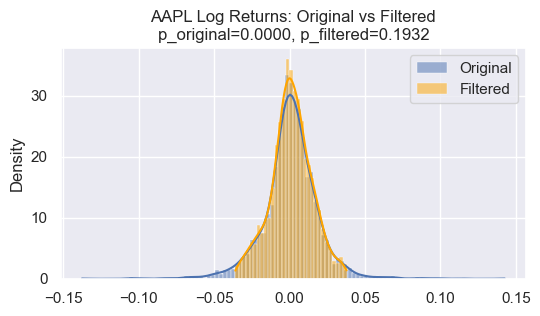

<Figure size 640x480 with 0 Axes>

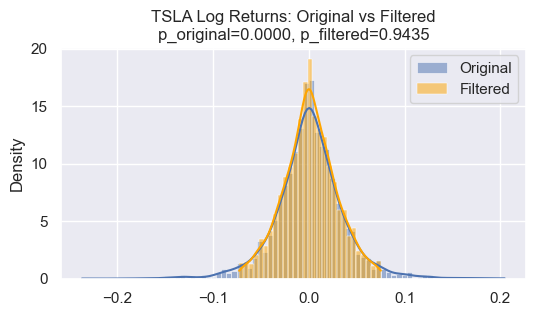

<Figure size 640x480 with 0 Axes>

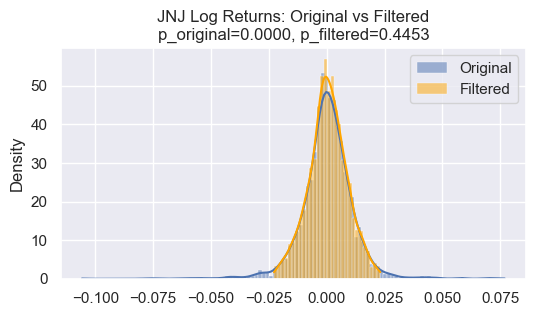

<Figure size 640x480 with 0 Axes>

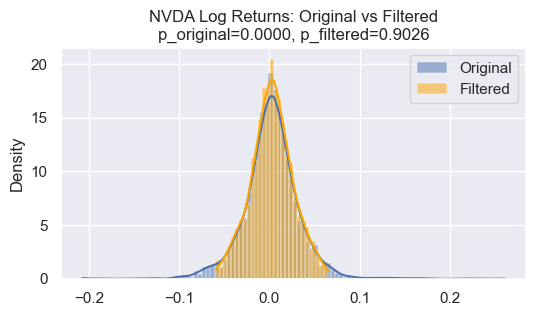

<Figure size 640x480 with 0 Axes>

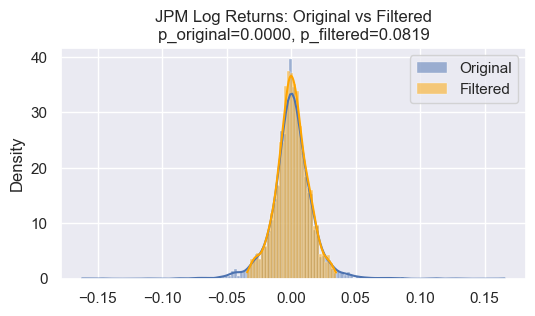

<Figure size 640x480 with 0 Axes>

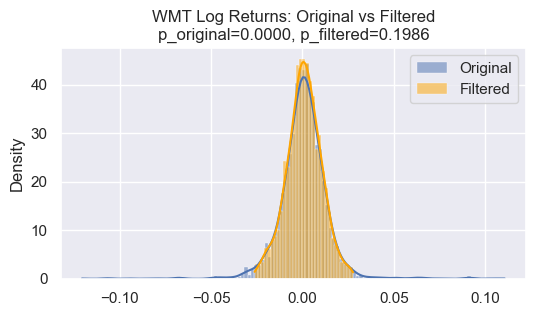

<Figure size 640x480 with 0 Axes>

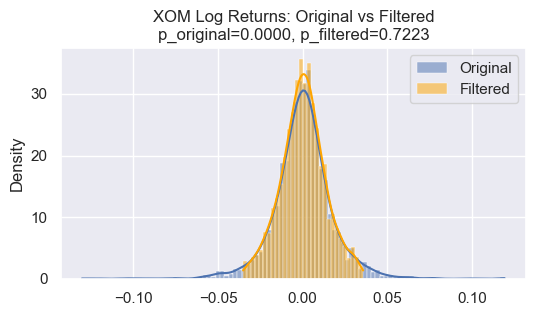

<Figure size 640x480 with 0 Axes>

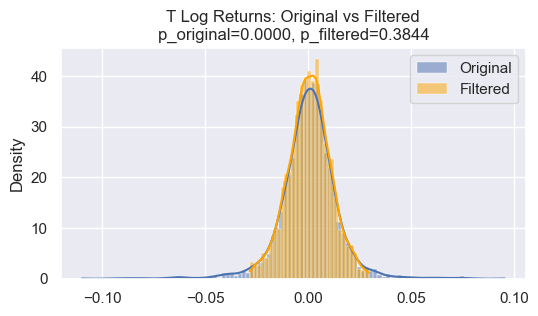

<Figure size 640x480 with 0 Axes>

In [58]:

# --- Outlier Effect  ---
for sym in symbols:
    original = log_return_dict[sym]
    filtered = remove_outliers(original, z_thresh=2.0)

    p_original, _ = normality_test_results(original)
    p_filtered, _ = normality_test_results(filtered)
    #print(p_original, p_filtered)
    plt.figure(figsize=(6, 3))
    sns.histplot(original, color='blue', label='Original', stat='density', kde=True)
    sns.histplot(filtered, color='orange', label='Filtered', stat='density', kde=True)
    plt.title(f"{sym} Log Returns: Original vs Filtered\np_original={p_original[0]:.4f}, p_filtered={p_filtered:.4f}")
    plt.legend()
    plt.show()
    plt.clf()

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_17011/2779121021.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lambda x: float(x[0]) if isinstance(x, list) else float(x)


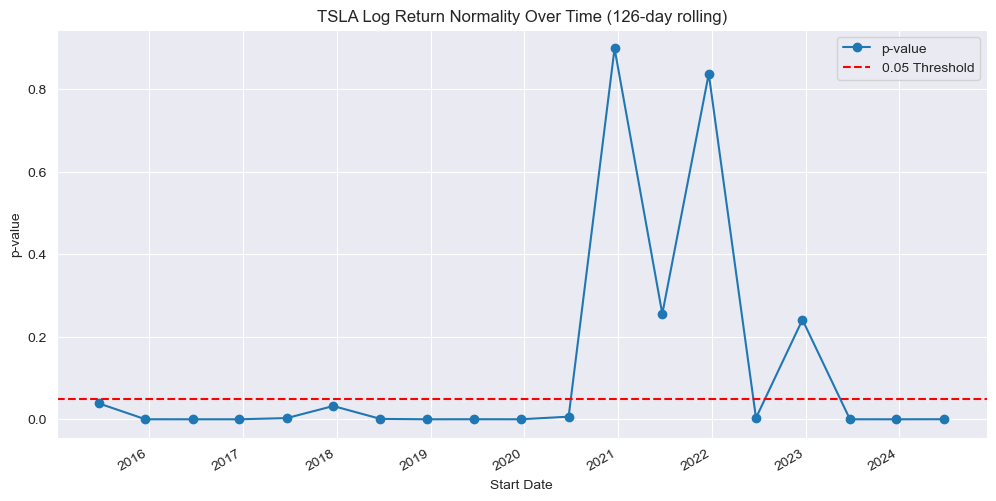

In [ ]:
# --- Rolling Normality Test ---
rolling_results = test_normality_over_time(original, window=126)
rolling_df = pd.DataFrame(rolling_results, columns=["Window", "Start Date", "p-value"])
rolling_df.set_index("Start Date", inplace=True)

rolling_df["p-value"] = rolling_df["p-value"].apply(
    lambda x: float(x[0]) if isinstance(x, list) else float(x)
)

plt.figure(figsize=(12, 6))
rolling_df["p-value"].plot(marker='o')
plt.axhline(0.05, color='red', linestyle='--', label='0.05 Threshold')
plt.title("TSLA Log Return Normality Over Time (126-day rolling)")
plt.ylabel("p-value")
plt.legend()
plt.show()


 Best *raw* weights: {'AAPL': 0.0, 'TSLA': 0.55, 'JNJ': 0.0, 'NVDA': 0.45} (p = 0.0000)
 Best *filtered* weights: {'AAPL': 0.1, 'TSLA': 0.8500000000000001, 'JNJ': 0.0, 'NVDA': 0.05} (p = 0.9971)


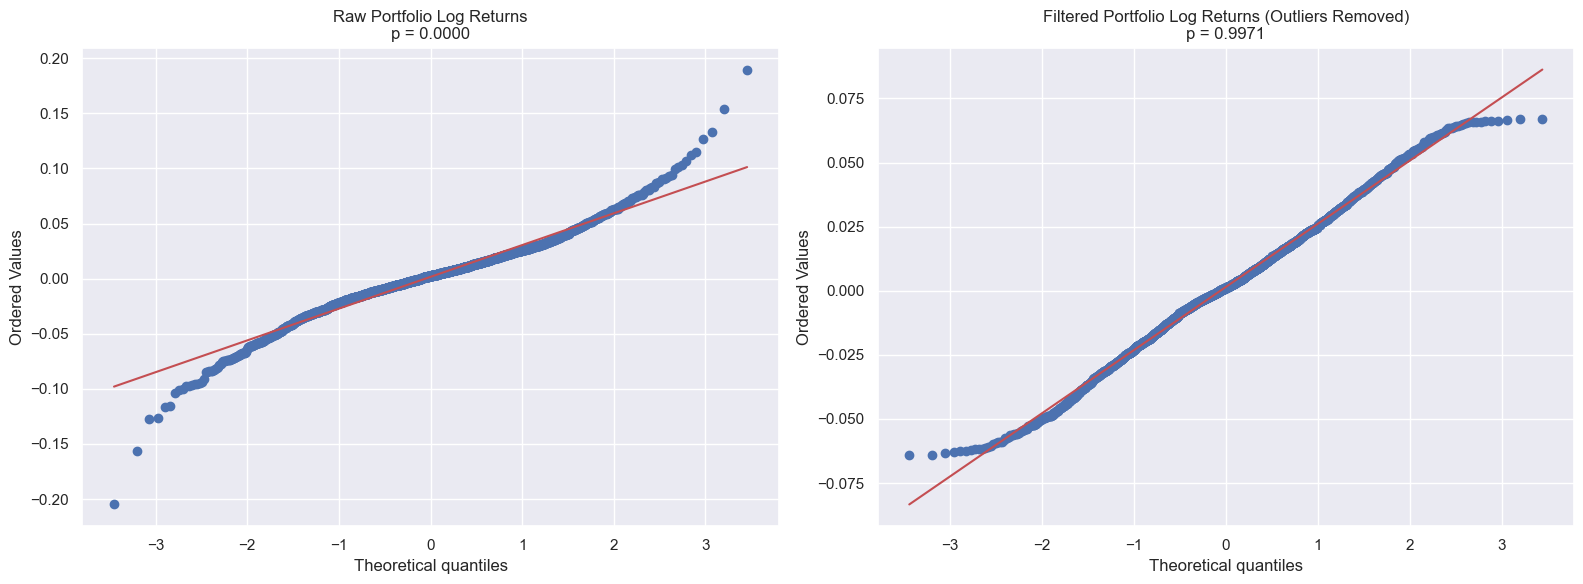

In [52]:
from itertools import product
from scipy.stats import normaltest

def generate_weight_combinations(n_assets, step=0.05):
    """
    Generate all combinations of n non-negative weights summing to 1.
    """
    grid = np.arange(0, 1 + step, step)
    for combo in product(grid, repeat=n_assets):
        if np.isclose(sum(combo), 1.0, atol=1e-4):
            yield combo

def compute_weighted_portfolio(log_return_dict, symbols, weights):
    weighted_returns = [
        weights[i] * log_return_dict[symbols[i]]
        for i in range(len(symbols))
    ]
    return pd.concat(weighted_returns, axis=1).dropna().sum(axis=1)


symbols = ['AAPL', 'TSLA', 'JNJ', 'NVDA']
           
step = 0.05  # finer = slower

best_p_raw = -np.inf
best_weights_raw = None
best_returns_raw = None

best_p_filtered = -np.inf
best_weights_filtered = None
best_returns_filtered = None

# --- Brute-force search ---
for weights in generate_weight_combinations(len(symbols), step):
    returns = compute_weighted_portfolio(log_return_dict, symbols, weights)
    returns_filtered = remove_outliers(returns, z_thresh=2.0)

    # Normality p-values
    p_raw = normaltest(returns)[1]
    p_filtered = normaltest(returns_filtered)[1]

    # Track best raw
    if p_raw > best_p_raw:
        best_p_raw = p_raw
        best_weights_raw = weights
        best_returns_raw = returns

    # Track best filtered
    if p_filtered > best_p_filtered:
        best_p_filtered = p_filtered
        best_weights_filtered = weights
        best_returns_filtered = returns_filtered

# --- Print results ---
print(f"\n Best *raw* weights: {dict(zip(symbols, best_weights_raw))} (p = {best_p_raw:.4f})")
print(f" Best *filtered* weights: {dict(zip(symbols, best_weights_filtered))} (p = {best_p_filtered:.4f})")

# --- Q-Q Plots ---
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Raw
stats.probplot(best_returns_raw, dist="norm", plot=axs[0])
axs[0].set_title(f"Raw Portfolio Log Returns\np = {best_p_raw:.4f}")
axs[0].grid(True)

# Filtered
stats.probplot(best_returns_filtered, dist="norm", plot=axs[1])
axs[1].set_title(f"Filtered Portfolio Log Returns (Outliers Removed)\np = {best_p_filtered:.4f}")
axs[1].grid(True)

plt.tight_layout()
plt.show()

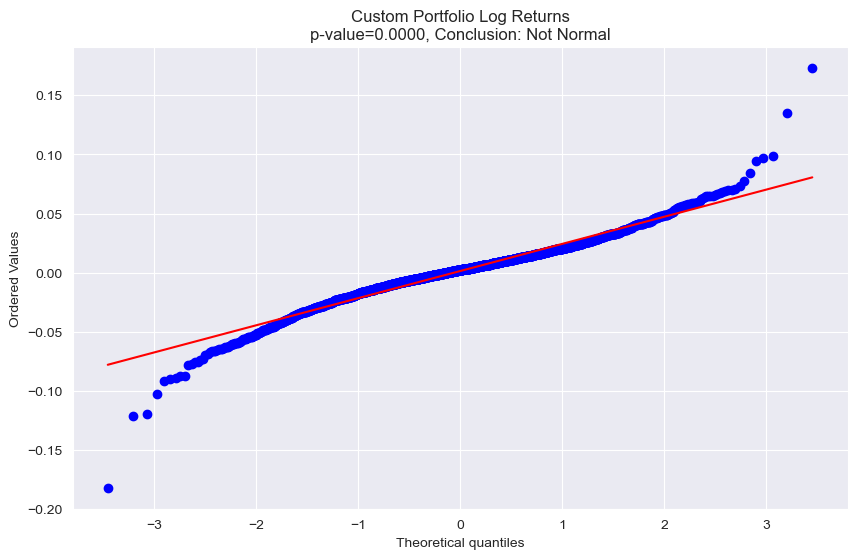

In [28]:

# --- Portfolio Normality (AAPL, MSFT, GOOG) ---
portfolio_returns = pd.concat([
    log_return_dict['AAPL'],
    log_return_dict['TSLA'],
    log_return_dict['NVDA']
], axis=1).dropna().mean(axis=1)
portfolio_returns.dropna(inplace=True)

p_portfolio, conclusion_portfolio = normality_test_results(portfolio_returns)

plt.figure(figsize=(10, 6))
stats.probplot(portfolio_returns, dist="norm", plot=plt)
plt.title(f"Custom Portfolio Log Returns\np-value={p_portfolio:.4f}, Conclusion: {conclusion_portfolio}")
plt.grid(True)
plt.show()



In [59]:
# --- Summary Table ---
summary_df = pd.DataFrame(p_value_summary)
summary_df.sort_values("Overall p-value", ascending=False, inplace=True)
print("\n📊 Summary of Normality Test Results:")
print(summary_df.to_string(index=False))


📊 Summary of Normality Test Results:
Symbol Overall p-value Conclusion
  AAPL           [0.0] Not Normal
  TSLA           [0.0] Not Normal
   JNJ           [0.0] Not Normal
  NVDA           [0.0] Not Normal
   JPM           [0.0] Not Normal
   WMT           [0.0] Not Normal
   XOM           [0.0] Not Normal
     T           [0.0] Not Normal
